# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
%matplotlib inline

# Reading csv data and displaying first 5 rows

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
display(df.head())
display(df.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Separation of dataset into Male and Female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


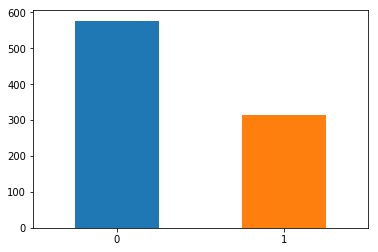

In [4]:
#change to numeric value
label, unique = pd.factorize(df.Sex)
df['Sex'] = label
male = df[df['Sex'] == 0]
female = df[df['Sex']== 1]

display(df.head())
df.Sex.value_counts().plot(kind='bar',rot=0)

## Survival Rate for Male and Female

In [5]:
total_male_survive = male['Survived'].value_counts()[1]
total_male_died = male['Survived'].value_counts()[0]
total_male = male['Sex'].value_counts()
# print(total_male,total_male_survive,total_male_died)
percentage_male_survived = total_male_survive/total_male

total_female_survive = female['Survived'].value_counts()[1]
total_female_died = female['Survived'].value_counts()[0]
total_female = female['Sex'].value_counts()
percentage_female_survived = total_female_survive/total_female

print('Percentage of females survived: ', percentage_female_survived[1])
print('Percentage of males survived: ', percentage_male_survived[0])

display(df[['Sex','Survived']].groupby('Sex',as_index=False).mean())

Percentage of females survived:  0.7420382165605095
Percentage of males survived:  0.18890814558058924


,Sex,Survived
0,0,0.188908
1,1,0.742038


## Separating by class

In [6]:
total_class3 = df[df['Pclass'] == 3]['Pclass'].value_counts()
total_class2 = df[df['Pclass'] == 2]['Pclass'].value_counts()
total_class1 = df[df['Pclass'] == 1]['Pclass'].value_counts()
# print(total_class1[1],total_class2[2],total_class3[3])
print('Total Class1:',total_class1[1])
print('Total Class2:',total_class2[2])
print('Total Class3:',total_class3[3])

Total Class1: 216
Total Class2: 184
Total Class3: 491


What is the proportion of survivors in the different classes?

In [7]:
class3 = df[df['Pclass']==3]
class3_survive = class3[class3['Survived'] == 1]['Survived'].value_counts()
class2 = df[df['Pclass']==2]
class2_survive = class2[class2['Survived'] == 1]['Survived'].value_counts()
class1 = df[df['Pclass']==1]
class1_survive = class1[class1['Survived'] == 1]['Survived'].value_counts()

print('Proportion of class 3 surviving:',class3_survive[1]/total_class3[3])
print('Proportion of class 2 surviving:',class2_survive[1]/total_class2[2])
print('Proportion of class 1 surviving:',class1_survive[1]/total_class1[1])


df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()

Proportion of class 3 surviving: 0.24236252545824846
Proportion of class 2 surviving: 0.47282608695652173
Proportion of class 1 surviving: 0.6296296296296297


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Separating by survival/death

In [8]:
male_survived = male[male['Survived'] == 1]
male_died = male[male['Survived']==0]
female_survived = female[female['Survived'] == 1]
female_died = female[female['Survived']==0]

### Male survival rates by class

In [22]:
class3_male = male[male['Pclass']==3]['Pclass'].value_counts()[3]
class2_male = male[male['Pclass']==2]['Pclass'].value_counts()[2]
class1_male = male[male['Pclass']==1]['Pclass'].value_counts()[1]

male_survived_byclass = pd.DataFrame(male_survived['Pclass'].value_counts()).reset_index().sort_values(by='index')
male_survived_byclass.columns = ['class','survived']

class3_male_survive = male_survived_byclass[male_survived_byclass['class']==3]
class3_male_survival_rate = class3_male_survive['survived']/class3_male

class2_male_survive = male_survived_byclass[male_survived_byclass['class']==2]
class2_male_survival_rate = class2_male_survive['survived']/class2_male

class1_male_survive = male_survived_byclass[male_survived_byclass['class']==1]
class1_male_survival_rate = class1_male_survive['survived']/class1_male
print("Class1 male survival rate: ",class1_male_survival_rate[1])
print("Class2 male survival rate: ",class2_male_survival_rate[2])
print("Class3 male survival rate: ",class3_male_survival_rate[0])

male_survived_byclass['rates'] = [class1_male_survival_rate[1],class2_male_survival_rate[2],class3_male_survival_rate[0]]


male_died_byclass = pd.DataFrame(male_died['Pclass'].value_counts()).reset_index().sort_values(by='index')
male_died_byclass.columns = ['class','died']

class3_male_died = male_died_byclass[male_died_byclass['class']==3]
class3_male_died_rate = class3_male_died['died']/class3_male

class2_male_died = male_died_byclass[male_died_byclass['class']==2]
class2_male_died_rate = class2_male_died['died']/class2_male

class1_male_died= male_died_byclass[male_died_byclass['class']==1]
class1_male_died_rate = class1_male_died['died']/class1_male
print("Class1 male death rate: ",class1_male_died_rate[2])
print("Class2 male death rate: ",class2_male_died_rate[1])
print("Class3 male death rate: ",class3_male_died_rate[0])

male_died_byclass['rates'] = [class1_male_died_rate[2],class2_male_died_rate[1],class3_male_died_rate[0]]


male_summary_df = pd.DataFrame()
male_summary_df['class'] = [1,2,3]
male_summary_df['survival_rate'] = [class1_male_survival_rate[1],class2_male_survival_rate[2],class3_male_survival_rate[0]]
male_summary_df['death_rate'] = [class1_male_died_rate[2],class2_male_died_rate[1],class3_male_died_rate[0]]
male_summary_df['total'] = male_summary_df['survival_rate']+male_summary_df['death_rate']
display(male_summary_df)

Class1 male survival rate:  0.36885245901639346
Class2 male survival rate:  0.1574074074074074
Class3 male survival rate:  0.13544668587896252
Class1 male death rate:  0.6311475409836066
Class2 male death rate:  0.8425925925925926
Class3 male death rate:  0.8645533141210374


,class,survival_rate,death_rate,total
0,1,0.368852,0.631148,1.0
1,2,0.157407,0.842593,1.0
2,3,0.135447,0.864553,1.0


## Female survival rates by class

In [19]:
class3_female = female[female['Pclass']==3]['Pclass'].value_counts()[3]
print('Number of class3 females:',class3_female)
class2_female = female[female['Pclass']==2]['Pclass'].value_counts()[2]
print('Number of class2 females:',class2_female)
class1_female = female[female['Pclass']==1]['Pclass'].value_counts()[1]
print('Number of class1 females:',class1_female)

female_survived_byclass = pd.DataFrame(female_survived['Pclass'].value_counts()).reset_index().sort_values(by='index')
female_survived_byclass.columns = ['class','survived']

class3_female_survive = female_survived_byclass[female_survived_byclass['class']==3]
class3_female_survival_rate = class3_female_survive['survived']/class3_female

class2_female_survive = female_survived_byclass[female_survived_byclass['class']==2]
class2_female_survival_rate = class2_female_survive['survived']/class2_female

class1_female_survive = female_survived_byclass[female_survived_byclass['class']==1]
class1_female_survival_rate = class1_female_survive['survived']/class1_female


print("Class3 female survival rate: ",class3_female_survival_rate[1])
print("Class2 female survival rate: ",class2_female_survival_rate[2])
print("Class1 female survival rate: ",class1_female_survival_rate[0])
female_survived_byclass['rates'] = [class1_female_survival_rate[0],class2_female_survival_rate[2],class3_female_survival_rate[1]]


female_died_byclass = pd.DataFrame(female_died['Pclass'].value_counts()).reset_index().sort_values(by='index')
female_died_byclass.columns = ['class','died']

class3_female_died = female_died_byclass[female_died_byclass['class']==3]
class3_female_died_rate = female_died_byclass['died']/class3_female

class2_female_died = female_died_byclass[female_died_byclass['class']==2]
class2_female_died_rate = female_died_byclass['died']/class2_female

class1_female_died= female_died_byclass[female_died_byclass['class']==1]
class1_female_died_rate = female_died_byclass['died']/class1_female
print("Class3 female death rate: ",class3_female_died_rate[0])
print("Class2 female death rate: ",class2_female_died_rate[1])
print("Class1 female death rate: ",class1_female_died_rate[2])
female_died_byclass['rates'] = [class1_female_died_rate[2],class2_female_died_rate[1],class3_female_died_rate[0]]

female_summary_df = pd.DataFrame()
female_summary_df['class'] = [1,2,3]
female_summary_df['survival_rate'] = [class1_female_survival_rate[0],class2_female_survival_rate[2],class3_female_survival_rate[1]]
female_summary_df['death_rate'] = [class1_female_died_rate[2],class2_female_died_rate[1],class3_female_died_rate[0]]
female_summary_df['total'] = female_summary_df['survival_rate']+female_summary_df['death_rate']
display(female_summary_df)

Number of class3 females: 144
Number of class2 females: 76
Number of class1 females: 94
Class3 female survival rate:  0.5
Class2 female survival rate:  0.9210526315789473
Class1 female survival rate:  0.9680851063829787
Class3 female death rate:  0.5
Class2 female death rate:  0.07894736842105263
Class1 female death rate:  0.031914893617021274


,class,survival_rate,death_rate,total
0,1,0.968085,0.031915,1.0
1,2,0.921053,0.078947,1.0
2,3,0.500000,0.500000,1.0


## Visualising Results

How does the class affect the survival and death rates of Male and Females?

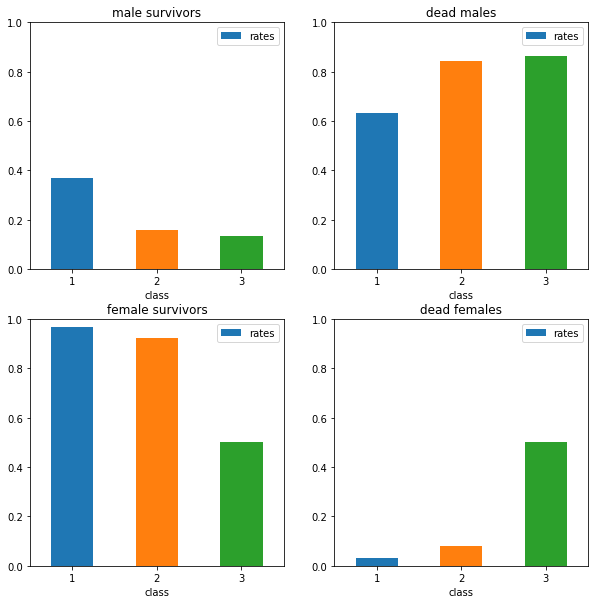

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
male_survived_byclass.plot(kind = 'bar', x='class', y='rates', ax=axes[0,0],rot=0,title='male survivors',ylim=[0,1])
female_survived_byclass.plot(kind = 'bar', x='class', y='rates', ax=axes[1,0],rot=0, title='female survivors',ylim=[0,1])
male_died_byclass.plot(kind = 'bar', x='class', y='rates', ax=axes[0,1],rot=0,title='dead males',ylim=[0,1])
female_died_byclass.plot(kind = 'bar', x='class', y='rates', ax=axes[1,1],rot=0,title='dead females',ylim=[0,1])
plt.show()

### Deduction

It can be seen that more females survived than compared to males and when looking at the class level, passengers from the higher class were able to survive than compared to those from the lower class

# Creating title column

In [24]:
df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
df['title'] = pd.factorize(df['title'])[0]
pd.factorize(df['title'])
df.loc[df['title']>2, 'title'] = 3

## Subdividing into Age group<br>
<li>Noticed that some Age values are <code>Null</code>. Need to solve that.</li>

<li>By making use of the median age group of each name title to assign the age for NA values</li>

<li>Display the spread of all ages</li>

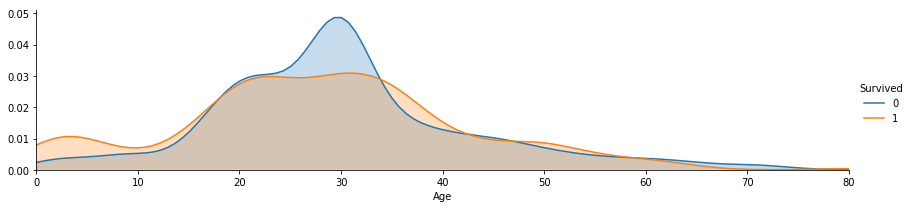

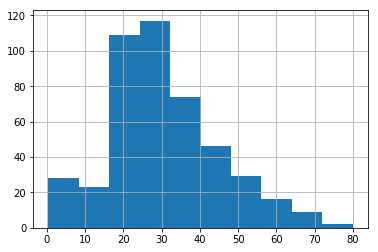

In [25]:
df['Age'].fillna(df.groupby('title')['Age'].transform("median"),inplace=True)

facet = sns.FacetGrid(df, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.show()
male['Age'].hist()
plt.show()

## Converting age into categories
<br>
<li>Children - 0</li>
<li>Teen - 1</li>
<li>Adult - 2</li>
<li>Mid age - 3</li>
<li>Elderly - 4</li>

In [26]:
df.loc[df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 21), 'Age'] = 1,
df.loc[(df['Age'] > 21) & (df['Age'] <= 40), 'Age'] = 2,
df.loc[(df['Age'] > 40) & (df['Age'] <= 60), 'Age'] = 3,
df.loc[df['Age'] > 60, 'Age'] = 4

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0


## Combining parent, children, sibling, spouse into 1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0,0.2


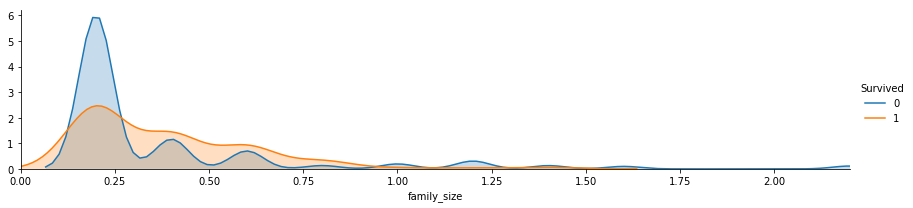

In [27]:
df['family_size'] = (df['SibSp'] + df['Parch'] + 1)/5
df['family_size'].unique()
display(df.head(5))


facet = sns.FacetGrid(df, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'family_size',shade = True)
facet.set(xlim=(0, df['family_size'].max()))
facet.add_legend()
plt.show()


## Dropping SibSp & Parch

In [28]:
df.drop(columns=['SibSp','Parch'],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,title,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,A/5 21171,7.2500,NaN,S,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,PC 17599,71.2833,C85,C,1,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,STON/O2. 3101282,7.9250,NaN,S,2,0.2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,113803,53.1000,C123,S,1,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,373450,8.0500,NaN,S,0,0.2


## Embarked

Checking the spread

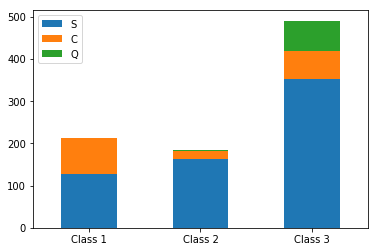

In [29]:
pclass1 = df[df['Pclass']==1]['Embarked'].value_counts()
pclass2 = df[df['Pclass']==2]['Embarked'].value_counts()
pclass3 = df[df['Pclass']==3]['Embarked'].value_counts()
embarked_df = pd.DataFrame([pclass1,pclass2,pclass3])
embarked_df.index = ['Class 1', 'Class 2', 'Class 3']
embarked_df.plot(kind='bar',stacked=True,rot=0)

## Converting to numeric category

In [30]:
label,unique = pd.factorize(df.Embarked)
df["Embarked"] = pd.DataFrame(label)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,title,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,A/5 21171,7.2500,NaN,0,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,PC 17599,71.2833,C85,1,1,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,STON/O2. 3101282,7.9250,NaN,0,2,0.2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,113803,53.1000,C123,0,1,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,373450,8.0500,NaN,0,0,0.2


## Converting Fare to categories

<li>First, fill all the NA values </li>
<li>Filter less than equal 7.91 = 0</li>
<li>Filter less than equal 14.454 = 1</li>
<li>Filter less than equal 31 = 2</li>
<li>Filter more than equal 7.91 = 3</li>

In [31]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1,
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare'] = 2,
df.loc[df['Fare'] > 31, 'Fare'] = 3

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,title,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,A/5 21171,0.0,NaN,0,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,PC 17599,3.0,C85,1,1,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,STON/O2. 3101282,1.0,NaN,0,2,0.2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,113803,3.0,C123,0,1,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,373450,1.0,NaN,0,0,0.2


# Removing the columns that are deemed to be unimportant

I felt that the place at which the passengers embarked from, the fare/ticket isn't very important. Fare itself can be disregarded as the <code>Pclass</code> column provides more information hence dropping <code>Cabin,Ticket,Name</code>

In [32]:
df.drop(columns=['Ticket','Name','Cabin'],inplace=True)

# Final dataset

In [33]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,family_size
0,1,0,3,0,2.0,0.0,0,0,0.4
1,2,1,1,1,2.0,3.0,1,1,0.4
2,3,1,3,1,2.0,1.0,0,2,0.2
3,4,1,1,1,2.0,3.0,0,1,0.4
4,5,0,3,0,2.0,1.0,0,0,0.2
5,6,0,3,0,2.0,1.0,2,0,0.2
6,7,0,1,0,3.0,3.0,0,0,0.2
7,8,0,3,0,0.0,2.0,0,3,1.0
8,9,1,3,1,2.0,1.0,0,1,0.6
9,10,1,2,1,0.0,2.0,1,1,0.4


# Machine Learning portion

In [34]:
import numpy as np
label = df['Survived']
features = df.drop(columns=['PassengerId','Survived'])

### Cross Validation (K-fold)

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10,shuffle=True,random_state=0)

### Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestRegressor(n_estimators=13,random_state=42)
clf = RandomForestClassifier(n_estimators=13)
# label = df['Survived']
# features = df.drop(columns=['PassengerId','Survived'])
xtrain, xtest, ytrain, ytest = train_test_split(features,label,test_size=0.20)
rf.fit(features,label)
# print(rf.score(xtest,ytest))
predictions = rf.predict(xtest)
x = pd.DataFrame([predictions,ytest]).T
x.columns = ['predict','True']
rf.score(xtest,ytest)



0.5724529479096269

### Random Forest Classifier

In [37]:
scoring = 'accuracy'
score = cross_val_score(clf,features,label,cv=kfold,n_jobs=1,scoring=scoring)
print(round(np.mean(score)*100,2))

81.59


### LinearSVC

In [38]:
from sklearn import svm
clf = svm.LinearSVC(random_state=0,tol=1e-5)
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.7821229050279329

### SVM

In [39]:
from sklearn.svm import SVC
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,features,label,cv=kfold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[0.81111111 0.7752809  0.80898876 0.82022472 0.84269663 0.80898876
 0.85393258 0.80898876 0.79775281 0.82022472]
81.48


### KNearestNeighbor

In [40]:
from sklearn.neighbors import KNeighborsClassifier
# print(df.info())
clf = KNeighborsClassifier(n_neighbors=14)
scoring = 'accuracy'
score = cross_val_score(clf,features,label,cv=kfold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[0.78888889 0.80898876 0.79775281 0.82022472 0.85393258 0.82022472
 0.79775281 0.80898876 0.79775281 0.79775281]
80.92


### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')
scoring = 'accuracy'
score = cross_val_score(clf,features,label,cv=kfold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[0.82222222 0.8988764  0.75280899 0.75280899 0.85393258 0.78651685
 0.84269663 0.83146067 0.76404494 0.80898876]
81.14


# Testing

## Cleaning up test file

In [42]:
test = pd.read_csv('test.csv')
test['title'] = test['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
test['title'] = pd.factorize(test['title'])[0]
pd.factorize(test['title'])
test.loc[test['title']>2, 'title'] = 3
test['Age'].fillna(test.groupby('title')['Age'].transform("median"),inplace=True)
test.loc[test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 21), 'Age'] = 1,
test.loc[(test['Age'] > 21) & (test['Age'] <= 40), 'Age'] = 2,
test.loc[(test['Age'] > 40) & (test['Age'] <= 60), 'Age'] = 3,
test.loc[test['Age'] > 60, 'Age'] = 4
test['family_size'] = (test['SibSp'] + test['Parch'] + 1)/5
test['family_size'].unique()
test.drop(columns=['SibSp','Parch'],inplace=True)
l,unique = pd.factorize(test.Embarked)
test["Embarked"] = pd.DataFrame(l)
test['Fare'].fillna(test['Fare'].median(),inplace=True)
test.loc[test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1,
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare'] = 2,
test.loc[test['Fare'] > 31, 'Fare'] = 3
l, unique = pd.factorize(test.Sex)
test['Sex'] = l
male = test[test['Sex'] == 0]
female = test[test['Sex']== 1]
test['Age'].fillna(test.groupby('title')['Age'].transform("median"),inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,title,family_size
0,892,3,"Kelly, Mr. James",0,2.0,330911,0.0,NaN,0,0,0.2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,363272,0.0,NaN,1,1,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,4.0,240276,1.0,NaN,0,0,0.2
3,895,3,"Wirz, Mr. Albert",0,2.0,315154,1.0,NaN,1,0,0.2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,3101298,1.0,NaN,1,1,0.6


### Creating test features and doing the predictions

In [43]:
test_features = test.drop(columns=['Name','Ticket','Cabin','PassengerId']).copy()

In [44]:
clf = SVC()
clf.fit(features,label)
prediction = clf.predict(test_features)

In [45]:
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": prediction})

submission.to_csv('submission.csv',index=False)

In [46]:
sub = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
rclf = RandomForestClassifier(n_estimators=100)
rclf.fit(features,label)
predict = rclf.predict(test_features)
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": prediction})

submission.to_csv('submission1.csv',index=False)

In [48]:
sub = pd.read_csv('submission1.csv')
submission.head()
rclf.score(features,label)

0.8832772166105499